In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom
from sklearn.metrics import confusion_matrix, classification_report
import os

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="C:/Users/Sneha/Desktop/work/plant/plant/Plant_disease_by_disease",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="C:/Users/Sneha/Desktop/work/plant/plant/Plant_disease_by_disease",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical' 
)


class_names = train_ds.class_names
print("Class Names (Diseases):", class_names)


Found 1612 files belonging to 9 classes.
Found 1612 files belonging to 9 classes.
Class Names (Diseases): ['Bacterial leaf blight', 'Blight', 'Brown spot', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', 'Leaf smut', 'septoria', 'stripe_rust']


In [10]:
augmentation_model = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)
])

train_ds = train_ds.map(lambda x, y: (augmentation_model(x, training=True), y))

In [11]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(len(class_names), activation='softmax')) 

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,467,689 (9.41 MB)

 Trainable params: 2,467,593 (9.41 MB)

 Non-trainable params: 96 (384.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [13]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds, verbose=1)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 529ms/step - accuracy: 0.3027 - loss: 2.0554 - val_accuracy: 0.2916 - val_loss: 3.3894
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 531ms/step - accuracy: 0.7009 - loss: 0.8086 - val_accuracy: 0.2785 - val_loss: 3.1390
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 526ms/step - accuracy: 0.7642 - loss: 0.5882 - val_accuracy: 0.5856 - val_loss: 1.3600
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 527ms/step - accuracy: 0.7439 - loss: 0.6363 - val_accuracy: 0.6650 - val_loss: 0.9617
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 521ms/step - accuracy: 0.7863 - loss: 0.5539 - val_accuracy: 0.6588 - val_loss: 0.9374
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 522ms/step - accuracy: 0.8459 - loss: 0.4387 - val_accuracy: 0.8449 - val_loss: 0.3978
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 523ms/step - accuracy: 0.8374 - loss: 0.4349 - val_accuracy: 0.6110 - val_loss: 1.2732
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 524ms/step - accuracy: 0.8385 - loss: 0.3888 - val_accu

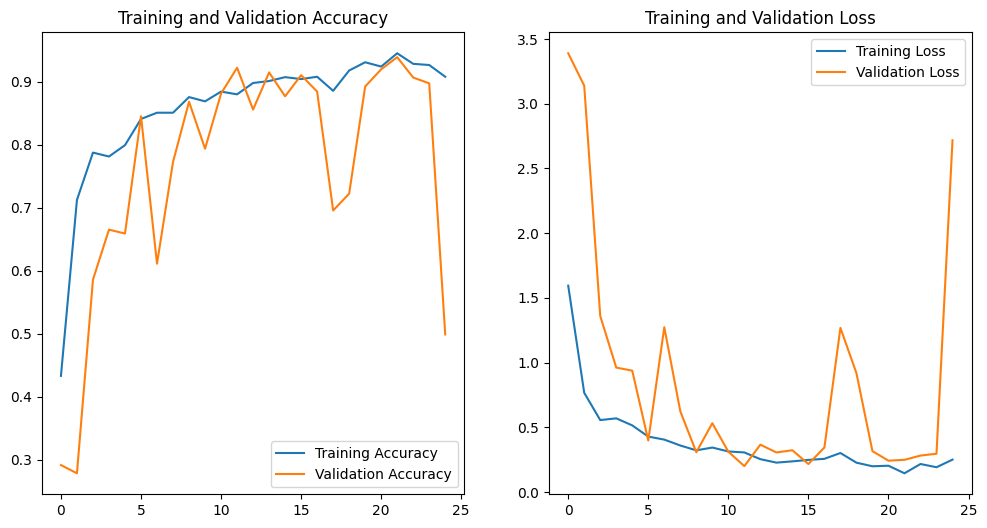

In [22]:
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_metrics(history)

In [23]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4983 - loss: 2.7191
Validation Loss: 2.7173681259155273
Validation Accuracy: 0.49875929951667786


In [24]:
model.save('plant_disease1.h5')

In [25]:
model.save('plant_disease1.keras')


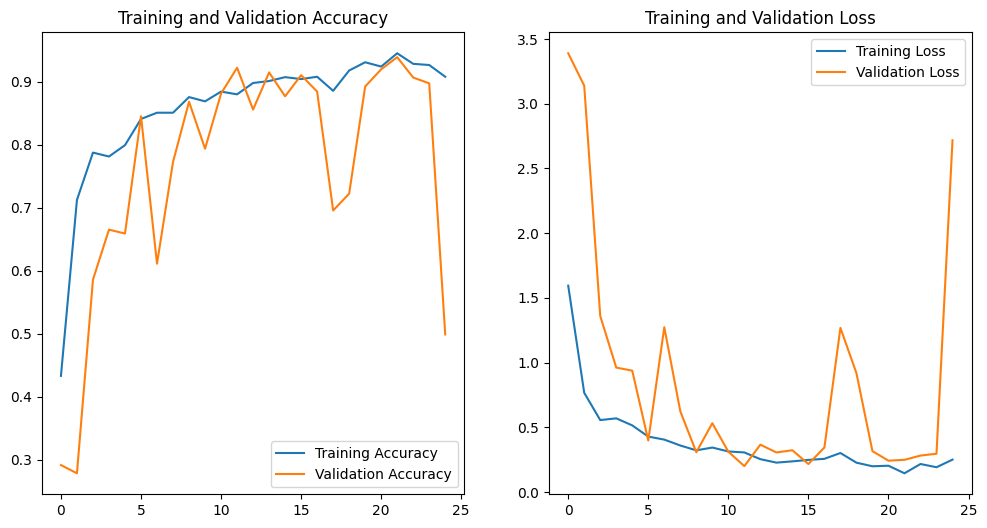

In [26]:
plot_metrics(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/st

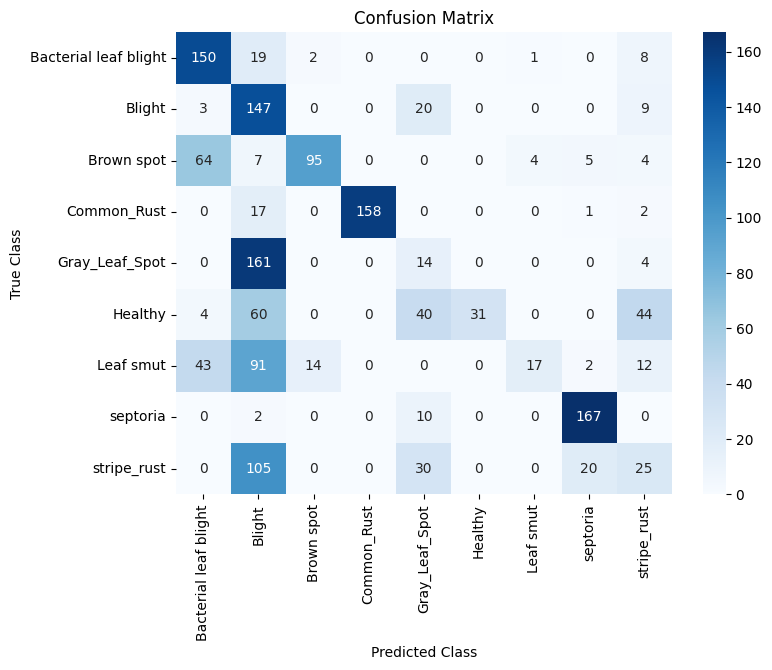

Classification Report:
                        precision    recall  f1-score   support

Bacterial leaf blight       0.57      0.83      0.68       180
               Blight       0.24      0.82      0.37       179
           Brown spot       0.86      0.53      0.66       179
          Common_Rust       1.00      0.89      0.94       178
       Gray_Leaf_Spot       0.12      0.08      0.10       179
              Healthy       1.00      0.17      0.30       179
            Leaf smut       0.77      0.09      0.17       179
             septoria       0.86      0.93      0.89       179
          stripe_rust       0.23      0.14      0.17       180

             accuracy                           0.50      1612
            macro avg       0.63      0.50      0.47      1612
         weighted avg       0.63      0.50      0.47      1612



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix_and_report(model, val_ds, class_names):
    # Get the true labels and predictions
    true_labels = []
    predicted_labels = []
    
    for images, labels in val_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))  
        true_labels.extend(np.argmax(labels, axis=1))  

    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print("Classification Report:\n", report)

plot_confusion_matrix_and_report(model, val_ds, class_names)


In [28]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5050 - loss: 2.7072
Validation Loss: 2.7173683643341064
Validation Accuracy: 0.49875929951667786


In [29]:
fertilizer_recommendations = {
    'stripe_rust': 'Use a nitrogen-rich fertilizer (e.g., Urea) to promote growth.',
    'Healthy': 'Regular balanced fertilizer (e.g., NPK 10-10-10) is recommended.',
    'septoria': 'Use a potassium-rich fertilizer to enhance plant resilience.',
    
    'Brown spot': 'Apply a balanced fertilizer with micronutrients.',
    'Leaf smut': 'Use a nitrogen-phosphorus-potassium (NPK) fertilizer to boost recovery.',
    'Bacterial leaf blight': 'Use organic fertilizers like compost to improve soil health.',
    
    'Gray_Leaf_Spot': 'Apply a fertilizer high in potassium for improved disease resistance.',
    'common_rust': 'Use a balanced NPK fertilizer to maintain overall plant health.',
    'blight': 'Organic fertilizers and compost to enhance soil quality are recommended.',
    
    'Healthy': 'Regular balanced fertilizer (e.g., NPK 10-10-10) is recommended for all types.'
}


In [33]:
def predict_single_image_with_fertilizer(model, img_path, img_height, img_width, class_names, fertilizer_recommendations):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]
    

    if predicted_class in fertilizer_recommendations:
        fertilizer_advice = fertilizer_recommendations[predicted_class]
    else:
        fertilizer_advice = "No recommendation available."
    
    print("Predicted class:", predicted_class)
    print("Confidence:", 100 * np.max(score))
    print("Fertilizer Recommendation:", fertilizer_advice)

predict_single_image_with_fertilizer(model, r"C:\Users\Sneha\Desktop\work\plant\plant\Plant_disease_by_disease\septoria\aug_0_2136.jpg", img_height, img_width, class_names, fertilizer_recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: septoria
Confidence: 25.361168384552002
Fertilizer Recommendation: Use a potassium-rich fertilizer to enhance plant resilience.
